<a href="https://colab.research.google.com/github/JJEEEFFFF/CE888-Lab/blob/main/Labs/lab2/CE888_7_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 2. Bootstrapping in Python**

##**I. Using Customers Data and Implementing Bootstrap Functions**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(sample, sample_size, n_iterations):
  samples = np.zeros((n_iterations, sample_size))
  for i in range(n_iterations):
    samples[i, :] = np.random.choice(sample, (sample_size), replace=True)
  data_mean = np.mean(samples)
  samples_means = np.mean(samples, axis=1)
  lower = np.percentile(samples_means, 2.5)
  upper = np.percentile(samples_means, 97.5)
  return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

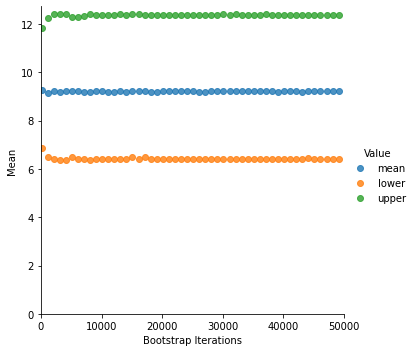

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)


In [5]:
def bootstrap_mean_ci(sample, sample_size, n_iterations, ci):
  samples = np.zeros((n_iterations, sample_size))
  for i in range(n_iterations):
    samples[i, :] = np.random.choice(sample, (sample_size), replace=True)
  data_mean = np.mean(samples)
  shift = (100 - ci) / 2.0
  samples_means = np.mean(samples, axis=1)
  lower = np.percentile(samples_means, shift)
  upper = np.percentile(samples_means, 100 - shift)
  return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

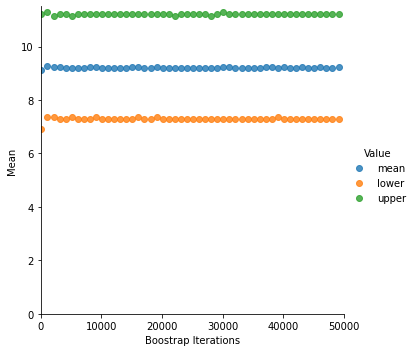

In [6]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


##**II. Using the Vehicle Dataset and Implementing Permutation Testing**

In [7]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
current_fleat = df['Current fleet']
new_fleat = df['New Fleet']
new_fleat = new_fleat[~np.isnan(new_fleat)]

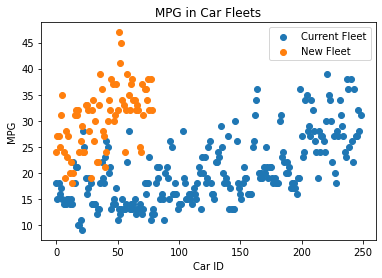

In [8]:
plt.scatter(range(len(current_fleat)), current_fleat, label='Current Fleet')
plt.scatter(range(len(new_fleat)), new_fleat, label='New Fleet')
plt.xlabel('Car ID')
plt.ylabel('MPG')
plt.title('MPG in Car Fleets')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Current Fleat')

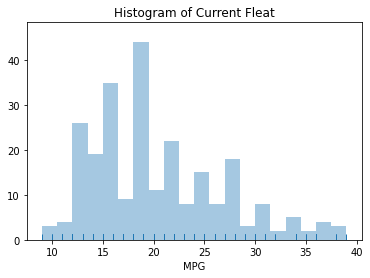

In [9]:
sns.distplot(current_fleat, bins=20, kde=False, rug=True, axlabel='MPG').set_title('Histogram of Current Fleat')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of New Fleat')

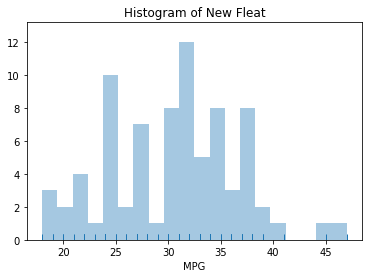

In [10]:
sns.distplot(new_fleat, bins=20, kde=False, rug=True, axlabel='MPG').set_title('Histogram of New Fleat')

In [11]:
mean_current, lower_current, upper_current = bootstrap_mean_ci(current_fleat, current_fleat.shape[0], 100000, 95)
mean_new, lower_new, upper_new = bootstrap_mean_ci(new_fleat, new_fleat.shape[0], 100000, 95)

In [23]:
print('Current Fleat:')
print('  Mean:', mean_current)
print('  Lower Mean (95% CI):', lower_current)
print('  Upper Mean (95% CI):', upper_current)
print()
print('New Fleat:')
print('  Mean:', mean_new)
print('  Lower Mean (95% CI):', lower_new)
print('  Upper Mean (95% CI):', upper_new)

Current Fleat:
  Mean: 20.142910080321286
  Lower Mean (95% CI): 19.3574297188755
  Upper Mean (95% CI): 20.951807228915662

New Fleat:
  Mean: 30.477464430379747
  Lower Mean (95% CI): 29.139240506329113
  Upper Mean (95% CI): 31.82278481012658


In [24]:
def permutation_test_mean(arrA, arrB, n_permutations):
  concat = np.concatenate((arrA, arrB))
  arrAsize = len(arrA)
  meanA = np.mean(arrA)
  meanB = np.mean(arrB)
  meanDiffObs = meanB - meanA
  count = 0
  for i in range(n_permutations):
    perm = np.random.permutation(concat)
    permA = perm[:arrAsize]
    permB = perm[arrAsize:]
    meanPermA = np.mean(permA)
    meanPermB = np.mean(permB)
    if meanPermB - meanPermA > meanDiffObs:
      count = count + 1
  return count / n_permutations

 **QUIZ**

In [25]:
bootstrap_mean_ci(data, data.shape[0], 10000, 95)

(9.22327857142857, 6.428571428571429, 12.428571428571429)

In [26]:
bootstrap_mean_ci(current_fleat, current_fleat.shape[0], 10000, 99)

(20.144080722891566, 19.112429718875504, 21.176706827309236)

In [27]:
bootstrap_mean_ci(current_fleat, current_fleat.shape[0], 10000, 95)

(20.146136144578314, 19.377510040160644, 20.93574297188755)

In [28]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [29]:
arrAA=np.array(dem_share_PA)
arrBB=np.array(dem_share_OH)
bootstrap_mean_ci(arrAA, len(arrAA), 25000, 90)
bootstrap_mean_ci(arrBB, len(arrBB), 25000, 90)

(44.32079270909088, 42.61060795454545, 46.03536363636364)

In [30]:
permutation_test_mean(arrAA,arrBB,20000)

0.7682